In [48]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_excel("insurance_data.xlsx")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


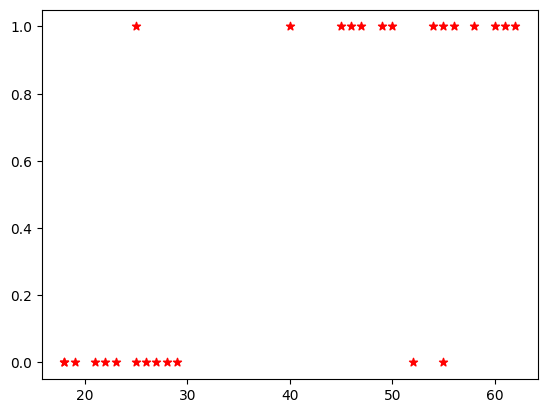

In [50]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='r')

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train,y_train)

LogisticRegression()

In [66]:
model.predict(x_test)

array([0, 1, 1], dtype=int64)

In [61]:
y_test

13    0
9     1
2     1
Name: bought_insurance, dtype: int64

In [62]:
model.score(x_test,y_test)

1.0

In [63]:
model.predict_proba(x_test)

array([[0.77944791, 0.22055209],
       [0.05981941, 0.94018059],
       [0.26948845, 0.73051155]])

In [69]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
left = data[data.left==1]
len(left)

3571

In [75]:
retained = data[data.left==0]
len(retained)

11428

<Axes: xlabel='salary'>

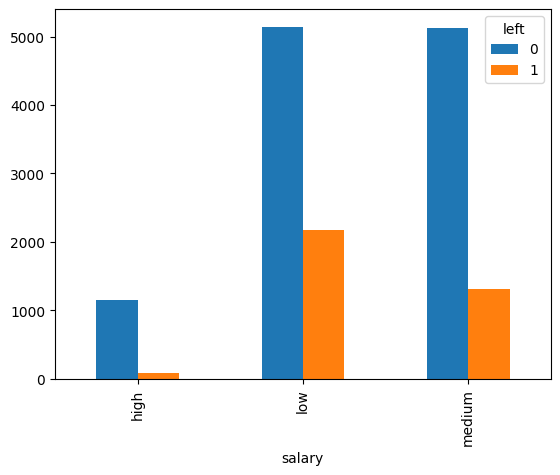

In [82]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

<Axes: xlabel='Department'>

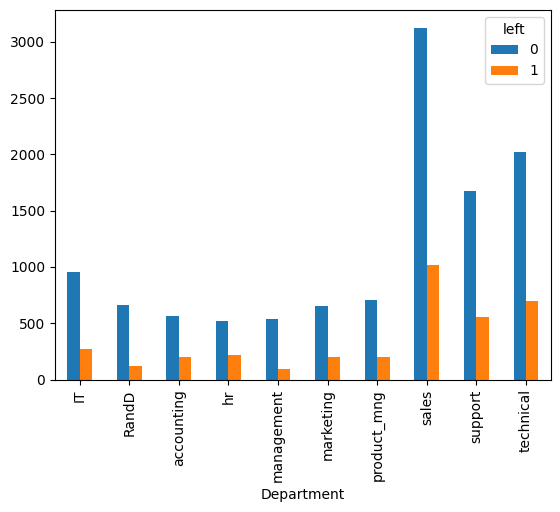

In [83]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [87]:
data_1 = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data_1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [96]:
sal_dummies = pd.get_dummies(data_1.salary)


In [103]:
data_1_with_dummies = pd.concat([data_1,sal_dummies],axis='columns')
data_1_with_dummies.drop('salary',axis='columns',inplace=True)
data_1_with_dummies.drop('medium',axis='columns',inplace=True)
data_1_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True


In [104]:
x = data_1_with_dummies
y = data.left


In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3)

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [109]:
model.fit(x_train,y_train)

C:\Users\Surya Teja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
model.score(x_test,y_test)

0.7853333333333333